# Cardiovascular Disease Dataset

We will study with a dataset on Cardiovascular Disease.

We'll try to understand the concepts like

- true means,
- confidence intervals,
- one sample t test,
- independent samples t test,
- homogenity of variance check (Levene's test),
- One-way ANOVA,
- Chi-square test.

Dataset from: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

# Data Preparation

⭐ Import pandas, scipy.stats, seaborn, and matplotlib.pyplot libraries

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns

⭐Run the following code to read in the "cardio.csv" file.

In [2]:
df = pd.read_csv("cardio.csv", sep=";")

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.shape

(70000, 13)

In [6]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


⭐Let's get rid of the outliers, moreover blood pressure could not be negative value!

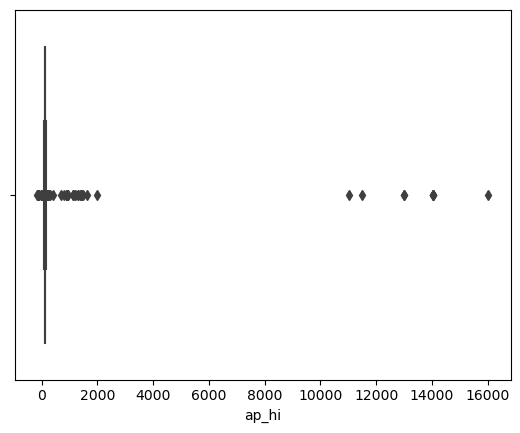

In [7]:
sns.boxplot(x="ap_hi", data=df);

In [8]:
df = df[df["ap_hi"] < 250]
df = df[df["ap_hi"] > 0]

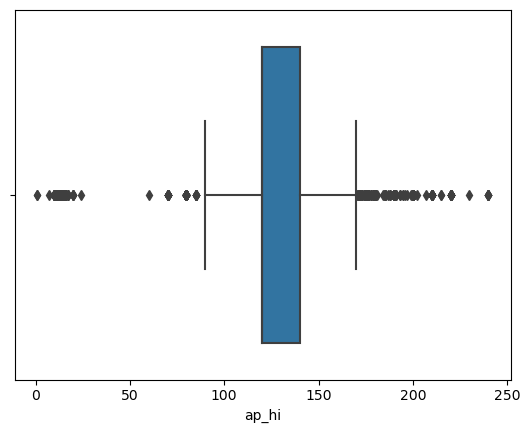

In [9]:
sns.boxplot(x="ap_hi", data=df);

In [10]:
iqr = stats.iqr(df.ap_hi)
iqr

20.0

In [11]:
np.percentile(df.ap_hi, 75) + 1.5*iqr

170.0

In [12]:
np.percentile(df.ap_hi, 25) - 1.5*iqr

90.0

In [13]:
df = df[df["ap_hi"] < 170]
df = df[df["ap_hi"] > 90]

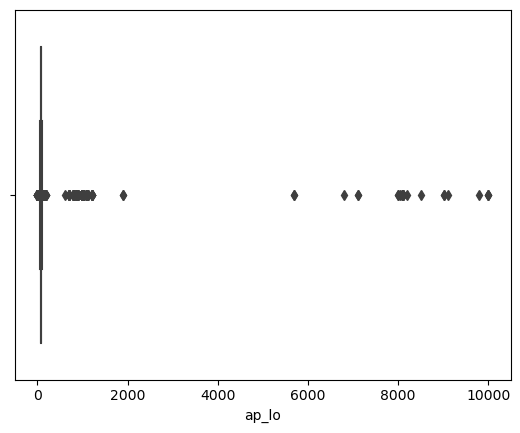

In [14]:
sns.boxplot(x="ap_lo", data=df);

In [15]:
df = df[df["ap_lo"] < 110]
df = df[df["ap_lo"] > 60]

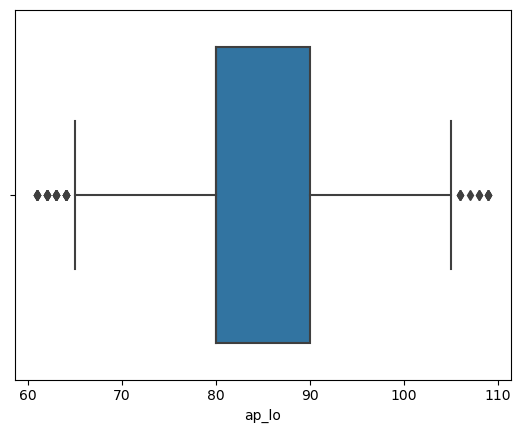

In [16]:
sns.boxplot(x="ap_lo", data=df);

In [17]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000
mean,49979.559451,19488.099508,1.351928,164.466256,74.211244,126.346242,81.714838,1.362315,1.225115,0.087665,0.052934,0.803600,0.495927
std,28857.662001,2457.996448,0.477576,8.144080,14.082985,13.779643,7.639202,0.679101,0.572492,0.282809,0.223904,0.397278,0.499987
min,0.000000,10859.000000,1.000000,55.000000,11.000000,93.000000,61.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24942.500000,17713.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50037.000000,19714.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74899.750000,21338.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,169.000000,109.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
df = df.sample(n = 500)

In [19]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,48530.88400,19422.272000,1.344000,164.76400,72.924000,126.056000,81.532000,1.318000,1.170000,0.072000,0.054000,0.788000,0.518000
std,28185.40775,2482.949205,0.475517,7.98372,12.695692,14.049614,7.918483,0.624224,0.499599,0.258747,0.226244,0.409134,0.500176
min,52.00000,14345.000000,1.000000,138.00000,23.000000,100.000000,69.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24482.75000,17653.250000,1.000000,160.00000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,47505.50000,19605.000000,1.000000,165.00000,70.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,71474.25000,21358.500000,2.000000,170.00000,80.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99855.00000,23602.000000,2.000000,188.00000,125.000000,160.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Task-1. Is the Systolic blood pressure population mean 122mmhg?

ap_hi => It's the Systolic blood pressure i.e. Pressure exerted when Blood is ejected in arteries. Normal value : 122 mm Hg for all adults aged 18 and over

⭐What is the mean for Systolic blood pressure?

In [20]:
df.ap_hi.mean()

126.056

⭐What is the standard deviation for Systolic blood pressure?

In [21]:
df.ap_hi.std()

14.049613777417148

⭐What is the standard error of the mean for Systolic blood pressure?

In [22]:
df.ap_hi.sem()

0.6283178292784468

⭐What are the descriptive statistics of the mean for Systolic blood pressure?

In [23]:
df.ap_hi.describe()

count    500.000000
mean     126.056000
std       14.049614
min      100.000000
25%      120.000000
50%      120.000000
75%      140.000000
max      160.000000
Name: ap_hi, dtype: float64

## Confidence Interval using the t Distribution

Key Notes about Confidence Intervals

💡A point estimate is a single number.

💡A confidence interval, naturally, is an interval.

💡Confidence intervals are the typical way to present estimates as an interval range.

💡The point estimate is located exactly in the middle of the confidence interval.

💡However, confidence intervals provide much more information and are preferred when making inferences.

💡The more data you have, the less variable a sample estimate will be.

💡The lower the level of confidence you can tolerate, the narrower the confidence interval will be.

⭐Investigate the given task by calculating the confidence interval. (Use 90%, 95% and 99% CIs)

In [24]:
stats.t.interval(0.99, 499, loc=df.ap_hi.mean(), scale=df.ap_hi.sem())

(124.4313474782205, 127.68065252177949)

In [25]:
stats.t.interval(0.95, 499, loc=df.ap_hi.mean(), scale=df.ap_hi.sem())

(124.82152549393507, 127.29047450606492)

In [26]:
stats.t.interval(0.90, 499, loc=df.ap_hi.mean(), scale=df.ap_hi.sem())

(125.02058689101584, 127.09141310898416)

## One Sample t Test

⭐Investigate the given task by using One Sample t Test.

Key Notes about Hypothesis Testing (Significance Testing)

💡Assumptions

💡Null and Alternative Hypothesis

💡Test Statistic

💡P-value

💡Conclusion

In [27]:
# H0: mu = 122
# Ha: mu =! 122

alpha = 0.01

**Conduct the significance test. Use scipy.stats.ttest_1samp**

In [28]:
Ttest_1sampResult = stats.ttest_1samp(df.ap_hi, 122)
Ttest_1sampResult

Ttest_1sampResult(statistic=6.455331698382438, pvalue=2.5622253514370174e-10)

In [29]:
p_value = Ttest_1sampResult.pvalue
p_value

2.5622253514370174e-10

In [30]:
if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.01 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.


**So the systolic blood pressure (ap_hi) population mean is not 122 mm Hg.**

## Task-2. Is There a Significant Difference Between Males and Females in Systolic Blood Pressure?

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

⭐Show descriptives for 2 groups

In [31]:
df.groupby("gender").describe()["ap_hi"]

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
1,328.0,125.356707,13.738856,100.0,120.0,120.0,130.0,160.0
2,172.0,127.389535,14.571642,100.0,120.0,120.0,140.0,160.0


___🚀Test the assumption of homogeneity of variance Hint: Levene’s Test

The hypotheses for Levene’s test are:

H0: "the population variances of group 1 and 2 are equal"

H1: "the population variances of group 1 and 2 are not equal"

In [32]:
stat, p = stats.levene(df[df["gender"]==1]["ap_hi"],df[df["gender"]==2]["ap_hi"])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05

if p > alpha:
	print('The population variances of group 1 and 2 are equal (fail to reject H0)')
else:
	print('The population variances of group 1 and 2 are not equal (reject H0)')

Statistics=1.583, p=0.209
The population variances of group 1 and 2 are equal (fail to reject H0)


___🚀Conduct the significance test. Use scipy.stats.ttest_ind

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

In [33]:
stats.ttest_ind(df[df["gender"]==1]["ap_hi"],df[df["gender"]==2]["ap_hi"], equal_var = True)

Ttest_indResult(statistic=-1.5390298948748193, pvalue=0.12443211991900056)

## Task-3. Is There a Relationship Between Glucose and Systolic Blood Pressure?

⭐Draw a boxplot to see the relationship.

<AxesSubplot:xlabel='gluc', ylabel='ap_hi'>

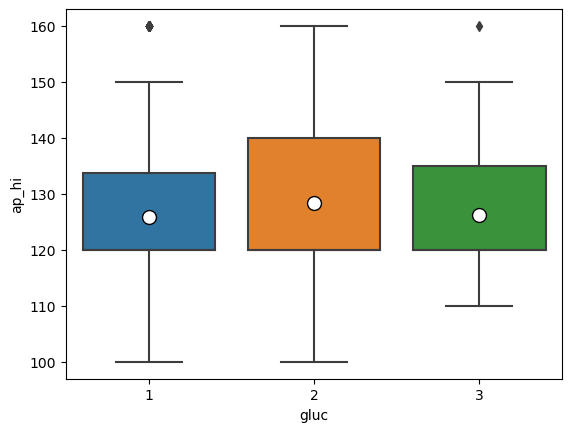

In [34]:
sns.boxplot(x="gluc", y="ap_hi", data=df, showmeans=True,  meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

⭐Show the descriptive statistics of 3 groups.

In [35]:
df.groupby("gluc").describe()["ap_hi"]

,count,mean,std,min,25%,50%,75%,max
gluc,,,,,,,,
1,442.0,125.877828,14.211346,100.0,120.0,120.0,133.75,160.0
2,31.0,128.387097,13.190091,100.0,120.0,120.0,140.00,160.0
3,27.0,126.296296,12.449327,110.0,120.0,120.0,135.00,160.0


In [36]:
# H0: All means are equal (mu1 = mu2 = mu3)
# Ha: At least one mean is different.

alpha = 0.05

⭐Conduct the relavant statistical test to see if there is a significant difference between the mean of the groups.

In [37]:
stats.f_oneway(df[df["gluc"]==1]["ap_hi"],
               df[df["gluc"]==2]["ap_hi"],
               df[df["gluc"]==3]["ap_hi"])

F_onewayResult(statistic=0.46519271764154085, pvalue=0.6282872332889791)

In [38]:
if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.05 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.


**So all means are not equal.**

In [39]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

In [40]:
multicomp = MultiComparison(df["ap_hi"], df["gluc"])

In [41]:
tukey = multicomp.tukeyhsd(alpha=0.05)

In [42]:
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   2.5093 0.6024  -3.6337 8.6522  False
     1      3   0.4185 0.9877  -6.1359 6.9728  False
     2      3  -2.0908 0.8389 -10.7942 6.6126  False
----------------------------------------------------


## Task-4. Is There a Relationship Between Physical activity vs. Presence or absence of cardiovascular disease?

### Physical activity vs. Presence or absence of cardiovascular disease

In [43]:
# H0: The two categorical variables are independent
# Ha: The two categorical variables are dependent

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 27021 to 36984
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           500 non-null    int64  
 1   age          500 non-null    int64  
 2   gender       500 non-null    int64  
 3   height       500 non-null    int64  
 4   weight       500 non-null    float64
 5   ap_hi        500 non-null    int64  
 6   ap_lo        500 non-null    int64  
 7   cholesterol  500 non-null    int64  
 8   gluc         500 non-null    int64  
 9   smoke        500 non-null    int64  
 10  alco         500 non-null    int64  
 11  active       500 non-null    int64  
 12  cardio       500 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 54.7 KB


⭐Create a crosstab using Pandas.

In [45]:
ct = pd.crosstab(df.active, df.cardio)
ct

cardio,0,1
active,,
0,39,67
1,202,192


⭐Conduct chi-square test to see if there is a relationship between 2 categorical variables.

In [46]:
chi, p, dof, expected = stats.chi2_contingency(ct)

In [47]:
print("test statistic", chi)
print("p-value", p)

test statistic 6.443292754320817
p-value 0.011137202022705676


In [48]:
dof

1

**As expected, given the high p-value, the test result does not detect a significant relationship between the variables.**

⭐Conduct chi-square test to see if there is a relationship between cholestrol and cardio.

In [49]:
ct = pd.crosstab(df.cholesterol, df.cardio)
ct

cardio,0,1
cholesterol,,
1,207,177
2,26,47
3,8,35


In [50]:
chi, p, dof, expected = stats.chi2_contingency(ct)

In [51]:
print("test statistic", chi)
print("p-value", p)

test statistic 24.722374459803888
p-value 4.2815852565524845e-06


**As expected, given the small p-value, the test result detects a statistically significant relationship between the between cholestrol and cardio.**

In [52]:
df.to_csv("cardio1.csv")